# 라이브러리

In [36]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_df = pd.read_csv("../open/train.csv")
train_df

,img_path,upscale_img_path,label
0,./train/TRAIN_00000.jpg,./upscale_train/TRAIN_00000.png,Ruddy Shelduck
1,./train/TRAIN_00001.jpg,./upscale_train/TRAIN_00001.png,Gray Wagtail
2,./train/TRAIN_00002.jpg,./upscale_train/TRAIN_00002.png,Indian Peacock
3,./train/TRAIN_00003.jpg,./upscale_train/TRAIN_00003.png,Common Kingfisher
4,./train/TRAIN_00004.jpg,./upscale_train/TRAIN_00004.png,Common Kingfisher
...,...,...,...
15829,./train/TRAIN_15829.jpg,./upscale_train/TRAIN_15829.png,Common Myna
15830,./train/TRAIN_15830.jpg,./upscale_train/TRAIN_15830.png,Common Kingfisher
15831,./train/TRAIN_15831.jpg,./upscale_train/TRAIN_15831.png,Cattle Egret
15832,./train/TRAIN_15832.jpg,./upscale_train/TRAIN_15832.png,Ruddy Shelduck


In [3]:
len(train_df['label'].unique())

25

In [5]:
test_df = pd.read_csv("../open/test.csv")
test_df

,id,img_path
0,TEST_00000,./test/TEST_00000.jpg
1,TEST_00001,./test/TEST_00001.jpg
2,TEST_00002,./test/TEST_00002.jpg
3,TEST_00003,./test/TEST_00003.jpg
4,TEST_00004,./test/TEST_00004.jpg
...,...,...
6781,TEST_06781,./test/TEST_06781.jpg
6782,TEST_06782,./test/TEST_06782.jpg
6783,TEST_06783,./test/TEST_06783.jpg
6784,TEST_06784,./test/TEST_06784.jpg


In [7]:
pic_1 = cv2.imread('../open/upscale_train/TRAIN_00000.png')
pic_1.shape

(256, 256, 3)

In [8]:
low_pic_1 = cv2.imread('../open/train/TRAIN_00000.jpg')
print(low_pic_1.shape)

resize_img = np.array(cv2.resize(low_pic_1, (32,32)))
print(resize_img.shape)

(64, 64, 3)
(32, 32, 3)


# LeNet-5

* 초기의 CNN 구조
* 주로 32x32 크기의 저해상도 이미지 분류에 유용

* 방법 1 : 이미지 크기를 64 or 128 이기 때문에 32로 변환
* 방법 2 : 64 or 128 크기의 이미지 처리할 수 있는 모델 수정

## 이미지 크기 32로 낮추기

In [9]:
le_train = train_df.copy()
le = preprocessing.LabelEncoder()
le_train['en_label'] = le.fit_transform(train_df['label'])
le_train

,img_path,upscale_img_path,label,en_label
0,./train/TRAIN_00000.jpg,./upscale_train/TRAIN_00000.png,Ruddy Shelduck,19
1,./train/TRAIN_00001.jpg,./upscale_train/TRAIN_00001.png,Gray Wagtail,9
2,./train/TRAIN_00002.jpg,./upscale_train/TRAIN_00002.png,Indian Peacock,13
3,./train/TRAIN_00003.jpg,./upscale_train/TRAIN_00003.png,Common Kingfisher,3
4,./train/TRAIN_00004.jpg,./upscale_train/TRAIN_00004.png,Common Kingfisher,3
...,...,...,...,...
15829,./train/TRAIN_15829.jpg,./upscale_train/TRAIN_15829.png,Common Myna,4
15830,./train/TRAIN_15830.jpg,./upscale_train/TRAIN_15830.png,Common Kingfisher,3
15831,./train/TRAIN_15831.jpg,./upscale_train/TRAIN_15831.png,Cattle Egret,2
15832,./train/TRAIN_15832.jpg,./upscale_train/TRAIN_15832.png,Ruddy Shelduck,19


### 데이터 처리

#### train 전처리

In [18]:
def low_image(x):
    resize_img = np.array(cv2.resize(x, (32,32)))
    # resize_img = resize_img.reshape(-1,32,32,3).astype('float32')/255
    img_flatten = resize_img.flatten()
    return img_flatten

low_image_path = '../open/train/'
file_list = os.listdir(low_image_path)
# print(file_list)
images = []

for i in file_list:
    img_path = os.path.join(low_image_path + i)
    img = cv2.imread(img_path)
    re_img = low_image(img)
    images.append(re_img)

x_df = pd.DataFrame(images)
x_df['label'] = le_train['en_label']
x_df


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,106,117,131,113,125,137,110,125,134,114,...,88,100,106,87,99,105,84,96,102,19
1,158,174,185,114,148,157,148,174,186,174,...,127,137,135,81,125,118,65,143,131,9
2,207,213,220,207,213,220,207,213,220,207,...,187,191,192,183,188,193,178,186,195,13
3,197,205,198,198,206,199,199,207,200,199,...,225,223,212,226,224,213,227,225,214,3
4,77,78,74,65,66,62,60,61,57,65,...,53,63,71,69,80,85,63,72,75,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15829,98,101,86,131,131,119,150,150,138,55,...,101,159,142,83,129,115,37,71,60,4
15830,182,190,197,193,202,206,198,206,207,197,...,114,140,154,114,139,150,109,135,143,3
15831,66,96,87,57,89,80,67,102,90,78,...,29,73,59,54,105,86,91,147,124,2
15832,175,176,167,178,179,170,177,178,169,173,...,154,170,152,153,169,151,155,171,153,19


#### test 전처리

In [19]:
def low_image(x):
    resize_img = np.array(cv2.resize(x, (32,32)))
    # resize_img = resize_img.reshape(-1,32,32,3).astype('float32')/255
    img_flatten = resize_img.flatten()
    return img_flatten

low_image_path = '../open/test/'
file_list = os.listdir(low_image_path)
# print(file_list)
images = []

for i in file_list:
    img_path = os.path.join(low_image_path + i)
    img = cv2.imread(img_path)
    re_img = low_image(img)
    images.append(re_img)

y_df = pd.DataFrame(images)
y_df


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,238,227,210,238,227,210,238,227,210,238,...,214,237,228,214,237,228,214,236,227,213
1,76,155,114,77,160,116,73,166,115,71,...,164,156,170,169,162,173,172,162,168,166
2,82,141,127,83,134,122,72,111,101,62,...,101,72,113,98,79,121,105,89,133,116
3,220,203,182,221,204,183,222,205,184,222,...,158,74,120,146,98,145,175,78,124,157
4,200,191,177,201,192,178,201,192,178,202,...,147,127,145,178,96,116,153,84,106,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,146,146,115,185,184,155,144,156,130,132,...,198,85,102,190,91,123,198,52,94,162
6782,125,130,131,121,127,126,121,126,125,118,...,85,71,85,77,71,85,81,75,89,87
6783,55,59,47,54,58,46,42,46,34,41,...,142,67,174,147,83,183,154,83,183,151
6784,77,87,104,76,84,100,78,85,99,105,...,99,70,79,93,60,69,81,52,58,68


#### 데이터 분할

In [23]:
temp_x_df = x_df.copy()
x_data = temp_x_df.iloc[:, :-1].values
temp_x_data = x_data.reshape(-1,32,32,3).astype('float32')/255
x_label = temp_x_df['label'].values

x_train, x_val, x_train_label, x_val_label \
    = train_test_split(temp_x_data, x_label, test_size = 0.2, random_state=1)

print(x_train.shape)
print(x_train_label.shape)
print(x_val.shape)
print(x_val_label.shape)

(12667, 32, 32, 3)
(12667,)
(3167, 32, 32, 3)
(3167,)


### 모델 생성

#### 기본 모델

In [39]:
def create_lenet5(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(25, activation='softmax'))
    # 마지막 출력 레이어는 라벨인코딩 수에 맞게 노드를 가져가야함
    return model


input_shape = (32, 32, 3)
model_1 = create_lenet5(input_shape)

model_1.summary()

c:\Users\ehdwn\OneDrive\바탕 화면\project\code\bird_image\bird\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 8, 8, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,362,457 (9.01 MB)

 Trainable params: 2,362,457 (9.01 MB)

 Non-trainable params: 0 (0.00 B)

##### 모델 학습

In [40]:
model_1.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy', # categorical_crossentropy --> x
                metrics = ['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_1 = model_1.fit(x_train, x_train_label, epochs=10, 
                        batch_size=32, validation_data=(x_val, x_val_label),
                        callbacks=[early_stopping])

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.0456 - loss: 3.2192 - val_accuracy: 0.0751 - val_loss: 3.1603
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.1078 - loss: 3.0526 - val_accuracy: 0.1645 - val_loss: 2.8845
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.1977 - loss: 2.7464 - val_accuracy: 0.2393 - val_loss: 2.6055
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.2791 - loss: 2.4587 - val_accuracy: 0.2848 - val_loss: 2.4272
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.3514 - loss: 2.1892 - val_accuracy: 0.3063 - val_loss: 2.3971
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.3878 - loss: 2.0127 - val_accuracy: 0.3483 - val_loss: 2.2538
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.4594 - loss: 1.7965 - val_accuracy: 0.3603 - val_loss: 2.2531
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.5349 - loss: 1.5387 -

##### 분류 및 검증

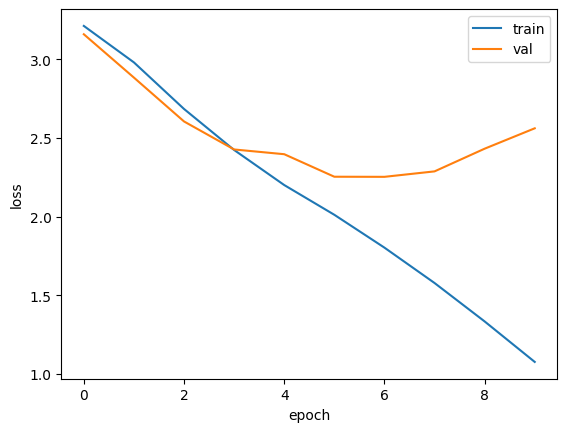

In [41]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##### 예측

In [46]:
temp_y = y_df.values.copy()
temp_y_data = temp_y.reshape(-1,32,32,3).astype('float32')/255

pred = model_1.predict(temp_y_data)
pred_df = pd.DataFrame(pred).round(2)
pred_df.idxmax(axis=1)

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


0        0
1        5
2       12
3       21
4       22
        ..
6781     3
6782     9
6783    20
6784    10
6785     6
Length: 6786, dtype: int64

## 이미지 크기 64 그대로 진행

### 데이터 처리